Loss = 0.0007183945272117853, GAIN_loss = 0.00048219377640634775, GAIN_rmse = 0.00023620064894203097, 
 BW_loss = 0.021958911791443825, BW_rmse = 0.01536882109940052
45/45 [==============================] - 0s 4ms/step


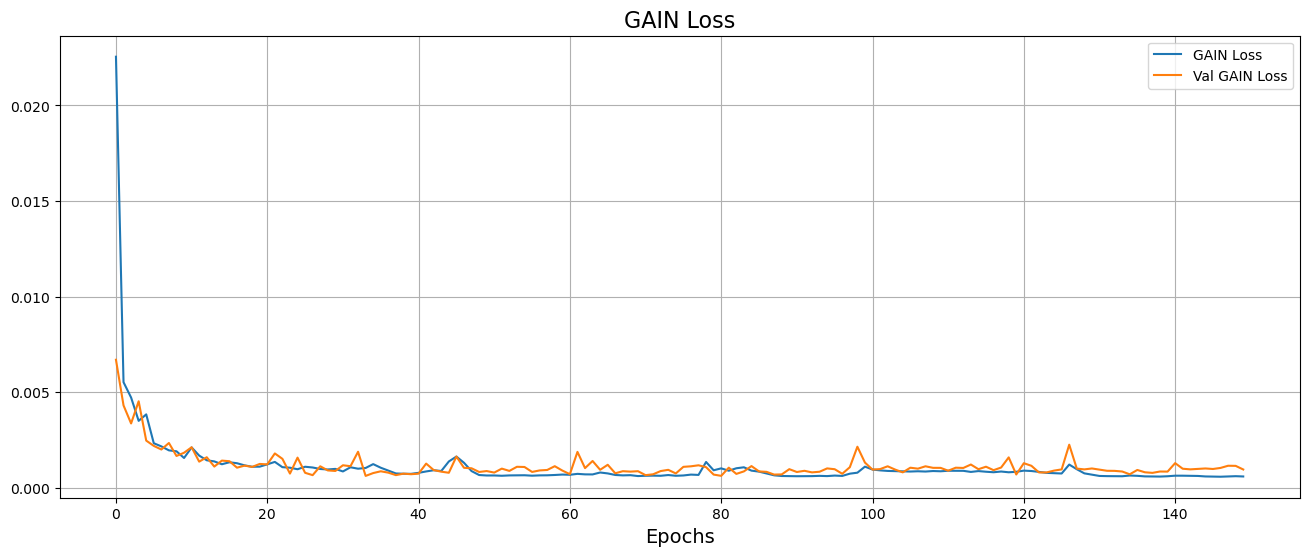

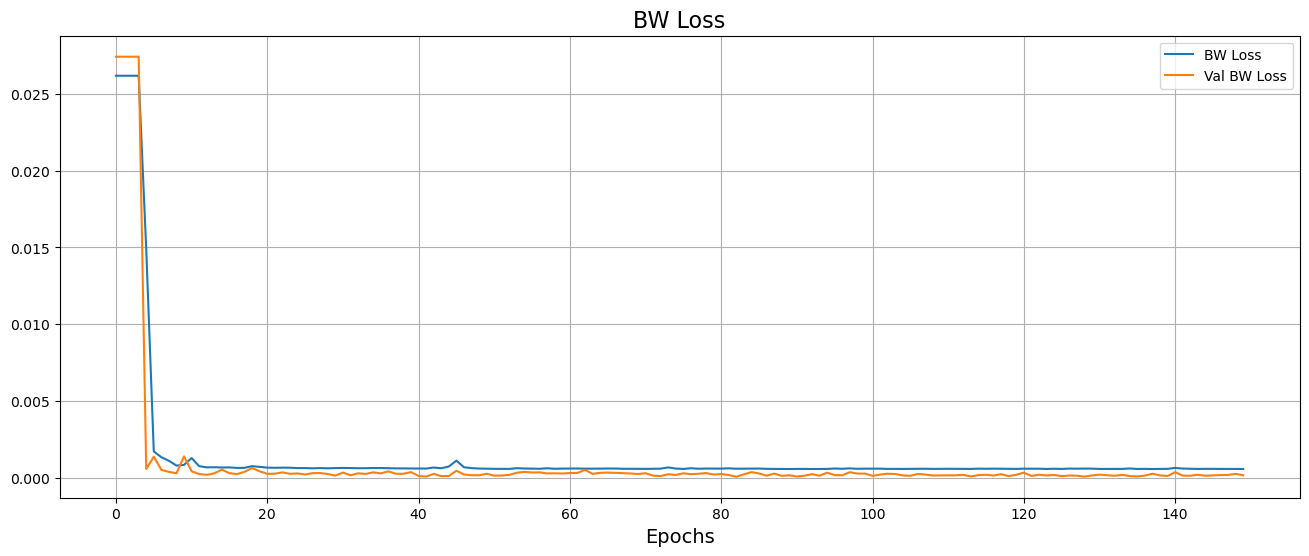

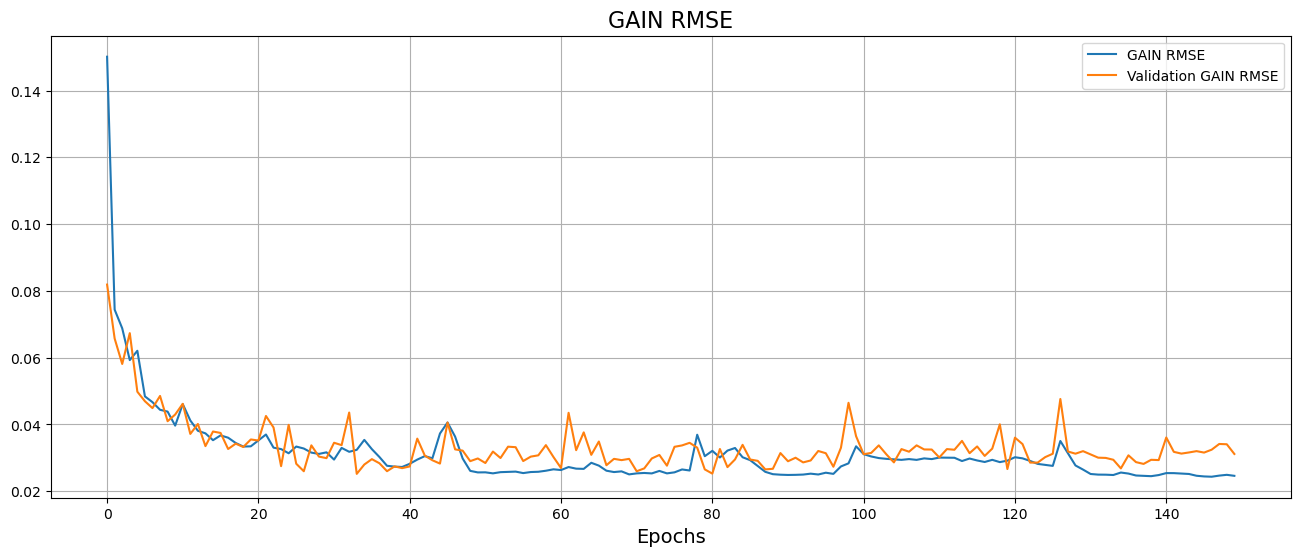

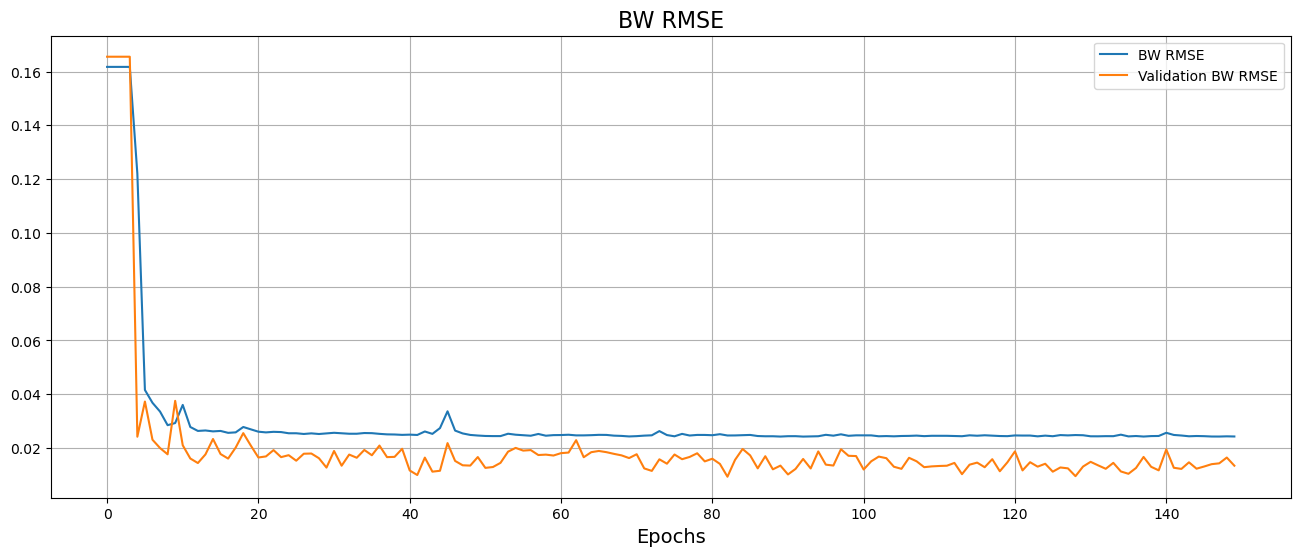

1412
1412
REAL 0.5931082 PRED_BW [0.53823364]
REAL 0.323668 PRED_GAIN [0.3136405]
REAL 0.5783844 PRED_BW [0.5309999]
REAL 0.328033273 PRED_GAIN [0.31378573]
REAL 0.5757984 PRED_BW [0.529707]
REAL 0.328760182 PRED_GAIN [0.31380707]
REAL 0.5652516 PRED_BW [0.48724732]
REAL 0.334901273 PRED_GAIN [0.3254364]
REAL 0.552307 PRED_BW [0.4257609]
REAL 0.339724545 PRED_GAIN [0.34099478]
REAL 0.5334976 PRED_BW [0.57887363]
REAL 0.345702182 PRED_GAIN [0.3175004]
REAL 0.5113362 PRED_BW [0.44323984]
REAL 0.347178727 PRED_GAIN [0.33972096]
REAL 0.5107876 PRED_BW [0.4854564]
REAL 0.359317818 PRED_GAIN [0.3394183]
REAL 0.4892362 PRED_BW [0.48742312]
REAL 0.371314364 PRED_GAIN [0.35185584]
REAL 0.482457 PRED_BW [0.45823994]
REAL 0.372557091 PRED_GAIN [0.3618599]
REAL 0.482156 PRED_BW [0.45890987]
REAL 0.372674 PRED_GAIN [0.36134964]
REAL 0.4816346 PRED_BW [0.46032998]
REAL 0.372875636 PRED_GAIN [0.36028594]
REAL 0.4795002 PRED_BW [0.46498317]
REAL 0.373695455 PRED_GAIN [0.35627347]
REAL 0.4750576 PRED_B

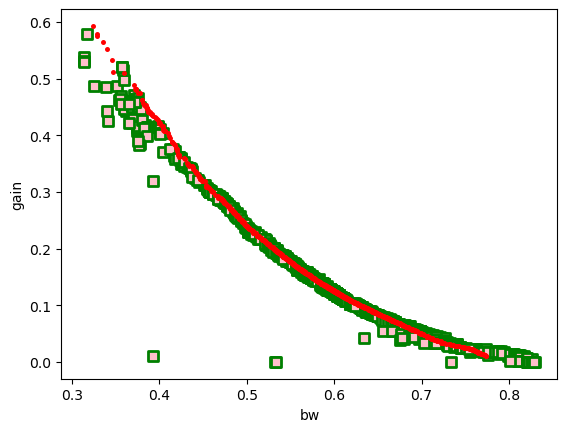

In [2]:
#Import libraries

import requests
import pydot

#Data visualization
import seaborn as sn
import matplotlib.pyplot as plt

#Data Manipulation
import pandas as pd
import numpy as np

# Machine Learning
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split


df = pd.read_csv(r'C:\Users\HAKAN\Desktop\BİTİRME - PROJESİ\son_rv1.csv')
df = df.drop(['Name','Value.constraint_gain_constraint','Value.constraint_pm_constraint' ], axis=1)

df1 = pd.read_csv(r'C:\Users\HAKAN\Desktop\BİTİRME - PROJESİ\real_test.csv')
df1 = df1.drop(['Name' ], axis=1) 

#Train test split
x_train, x_test = train_test_split(df, test_size = 0.2,random_state=42)
x_test1 = df1

#train values
Y1_train = np.array(x_train["Value.gain"])
Y2_train = np.array(x_train["Value.bw"])

#test values
Y1_test = np.array(x_test["Value.gain"])
Y2_test = np.array(x_test["Value.bw"])

Y11_test = np.array(x_test1["Value.gain"])
Y22_test = np.array(x_test1["Value.bw"])

#remove the target values from the dataset
x_train = x_train.drop(["Value.gain","Value.bw"], axis = 1)
x_test = x_test.drop(["Value.gain","Value.bw"], axis = 1)

x_test1 = x_test1.drop(["Value.gain","Value.bw"], axis = 1)
     

#normalization
x_train_norm = (x_train-x_train.mean())/x_train.std()
x_test_norm = (x_test-x_test.mean())/x_test.std()


x_test1_norm = (x_test1-x_test1.mean())/x_test1.std()     


# defining layers
input_layer = Input(shape=(len(x_train.columns)))
dense_layer_1 = Dense(units = 160, activation = "relu")(input_layer) 
dense_layer_2 = Dense(units = 300, activation = "relu")(dense_layer_1)
dense_layer_3 = Dense(units = 80, activation = "relu")(dense_layer_2)


#GAIN_ output
y1_output = Dense(units = 1, activation='relu' ,name = "GAIN_output")(dense_layer_3)

#BW_output  
y2_output = Dense(units = 1, activation='relu', name = "BW_output")(dense_layer_3)


#Define the model with the input layer and a list of outputs
model = Model(inputs = input_layer, outputs = [y1_output, y2_output])

#specify the optimizer and compile with the loss function for both outputs
#optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
 

model.compile(optimizer = optimizer,
              loss = {'GAIN_output':'mse', 'BW_output':'mse'},
              metrics = {
                  'GAIN_output':tf.keras.metrics.RootMeanSquaredError(),
                  'BW_output':tf.keras.metrics.RootMeanSquaredError(),
              }
             )

plot_model(model, show_shapes=True )


#training process
history = model.fit(x_train_norm, (Y1_train, Y2_train), epochs =150 , batch_size =10,
                    validation_data = (x_test_norm, (Y1_test, Y2_test)), verbose = 0)


     

#testing process
loss, Y11_loss, Y11_rmse, Y22_loss, Y22_rmse = model.evaluate(x = x_test1_norm, y = (Y11_test, Y22_test), verbose=0)
print(f"Loss = {loss}, GAIN_loss = {Y11_loss}, GAIN_rmse = {Y11_rmse}, \n BW_loss = {Y22_loss}, BW_rmse = {Y22_rmse}")



history.history.keys()


     
def plot_line(metric_1,metric_2, title, label1, label2):
    plt.figure(figsize=(16,6))
    plt.title(title, fontsize = 16)
    plt.plot(metric_1, label = label1)
    plt.plot(metric_2, label = label2)
    plt.xlabel("Epochs", fontsize = 14)
    plt.grid()
    plt.legend(loc= "best")
    
def scatter_plot(true, predictions, title):
    plt.figure(figsize=(16,6))
    plt.scatter(predictions, true)
    plt.title(title, fontsize = 16)
    plt.xlabel("BW", fontsize = 14)
    plt.ylabel("GAIN", fontsize = 14)
    plt.grid()
    
def scatter_plot1(true, predictions, title):
    plt.figure(figsize=(16,6))
    plt.scatter(predictions, true)
    plt.title(title, fontsize = 16)
    plt.xlabel("BW", fontsize = 14)
    plt.ylabel("GAIN", fontsize = 14)
    plt.grid()
    
    
    
loss = history.history["loss"]
y1_output_loss = history.history["GAIN_output_loss"]
y2_output_loss = history.history["BW_output_loss"]
y1_output_rmse = history.history["GAIN_output_root_mean_squared_error"]
y2_output_rmse = history.history["BW_output_root_mean_squared_error"]


val_loss = history.history["loss"]
val_y1_output_loss = history.history["val_GAIN_output_loss"]
val_y2_output_loss = history.history["val_BW_output_loss"]
val_y1_output_rmse = history.history["val_GAIN_output_root_mean_squared_error"]
val_y2_output_rmse = history.history["val_BW_output_root_mean_squared_error"]


     

plot_line(y1_output_loss, val_y1_output_loss, title ="GAIN Loss", label1 = "GAIN Loss", label2 = "Val GAIN Loss")
plot_line(y2_output_loss, val_y2_output_loss, title ="BW Loss", label1 = "BW Loss", label2 = "Val BW Loss")
plot_line(y1_output_rmse, val_y1_output_rmse, title ="GAIN RMSE", label1 = "GAIN RMSE", label2 = "Validation GAIN RMSE")
plot_line(y2_output_rmse, val_y2_output_rmse, title ="BW RMSE", label1 = "BW RMSE", label2 = "Validation BW RMSE")
 

Y1_pred , Y2_pred = model.predict(x_test1_norm)


#scatter_plot1(Y1_pred, Y2_pred, "BW-GAIN")
#scatter_plot1(Y11_test, Y22_test, "BW-GAIN")

plt.show()
plt.scatter(Y1_pred, Y2_pred, c ="pink",
            linewidths = 2,
            marker ="s",
            edgecolor ="green",
            s = 50)
plt.scatter(Y11_test, Y22_test, c ="yellow",
           linewidths = 2,
            marker =".",
            edgecolor ="red",
            s = 10)

plt.xlabel('bw')
plt.ylabel('gain')

print(len(Y2_pred))
print(len(Y22_test))

for i in range(len(Y2_pred)):
    print('REAL',Y22_test[i],'PRED_BW' ,Y2_pred[i])
    print('REAL',Y11_test[i],'PRED_GAIN' ,Y1_pred[i])